In [3]:
import pandas as pd
import sys  
sys.path.insert(0, './Moduulit')
pd.options.mode.chained_assignment = None
# Importtaus tässä muodossa
from database_connection import database_query
from outliers import find_outliers, draw_histogram
from clean_dataframe import clean_dataframe
from write_df_to_database import write_df_to_mariadb
from xy_diskretisointi import xy_to_grid
from timestamp import aukioloajat
# tai from ... import *


# Jos datasetti on "df"

# Esim. find_outliers(df)
# Esim. draw_histogram(df['x'], df['y'], 20) <-- kolmas meinaa bins arvoa, eli histogrammin "rakeisuutta"

In [4]:
df = pd.read_csv('/home/jovyan/work/projekti-2-team-fox/laurijutut/projekti2.csv').head(500000)
df

,Unnamed: 0,node_id,timestamp,x,y,z,q
0,0,b'-2393099149039893833',b'2020-06-24 12:20:08.533016+00:00',2762,-257,100,0
1,1,b'-2393099149039893833',b'2020-06-24 12:20:08.620015+00:00',2870,-344,100,0
2,2,b'-2393099149039893833',b'2020-06-24 12:20:09.622827+00:00',2916,-344,100,0
3,3,b'-2393099149039893833',b'2020-06-24 12:20:09.622846+00:00',2894,-254,100,0
4,4,b'-2393099149039893833',b'2020-06-24 12:20:10.116102+00:00',2888,-188,100,0
...,...,...,...,...,...,...,...
499995,499995,b'-2393099149039893833',b'2020-10-10 10:53:36.062033+00:00',1787,-178,100,0
499996,499996,b'-2393099149039893833',b'2020-10-10 10:53:42.062113+00:00',1785,-203,100,0
499997,499997,b'-2393099149039893833',b'2020-10-10 10:53:43.06189+00:00',1785,-210,100,0
499998,499998,b'-2393099149039893833',b'2020-10-10 10:53:44.062039+00:00',1779,-219,100,0


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs
Number of missing variables in table
 Unnamed: 0    0
node_id       0
timestamp     0
x             0
y             0
z             0
q             0
dtype: int64
------------------------------
Unique values in columns

uniques in x 4735
uniques in y 4484
uniques in z 1
uniques in q 1
------------------------------
Checking z and q columns

uniques in z [100]
uniques in q [0]
------------------------------
Number of nodes: 1
------------------------------
Outliers

Data with outliers:  500000
Ouliers removed:     3079
Data after:  496921


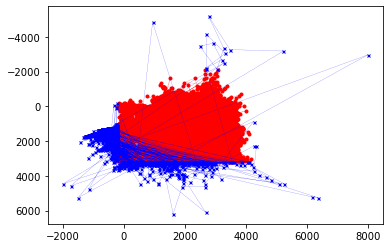

In [5]:
%time
df = find_outliers(df)

In [6]:
%time
df = clean_dataframe(df)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.78 µs


In [10]:
df = df.drop(['Unnamed: 0'], axis = 1)
df = df.drop(['index'], axis = 1)

In [11]:
df

,node_id,timestamp,x,y
0,1,2020-06-24 15:20:08.533,2762,-257
1,1,2020-06-24 15:20:08.620,2870,-344
2,1,2020-06-24 15:20:09.623,2916,-344
3,1,2020-06-24 15:20:09.623,2894,-254
4,1,2020-06-24 15:20:10.116,2888,-188
...,...,...,...,...
467359,1,2020-10-10 13:53:36.062,1787,-178
467360,1,2020-10-10 13:53:42.062,1785,-203
467361,1,2020-10-10 13:53:43.062,1785,-210
467362,1,2020-10-10 13:53:44.062,1779,-219


In [24]:
df['viikonpäivä'] = df.timestamp.dt.dayofweek
df['kellonaika'] = df.timestamp.dt.time

df

,node_id,timestamp,x,y,viikonpäivä,kellonaika
0,1,2020-06-24 15:20:08.533,2762,-257,2,15:20:08.533000
1,1,2020-06-24 15:20:08.620,2870,-344,2,15:20:08.620000
2,1,2020-06-24 15:20:09.623,2916,-344,2,15:20:09.623000
3,1,2020-06-24 15:20:09.623,2894,-254,2,15:20:09.623000
4,1,2020-06-24 15:20:10.116,2888,-188,2,15:20:10.116000
...,...,...,...,...,...,...
467359,1,2020-10-10 13:53:36.062,1787,-178,5,13:53:36.062000
467360,1,2020-10-10 13:53:42.062,1785,-203,5,13:53:42.062000
467361,1,2020-10-10 13:53:43.062,1785,-210,5,13:53:43.062000
467362,1,2020-10-10 13:53:44.062,1779,-219,5,13:53:44.062000


In [25]:
corrMatrix = df.corr()
print (corrMatrix)

             node_id         x         y  viikonpäivä
node_id          NaN       NaN       NaN          NaN
x                NaN  1.000000 -0.132362     0.001998
y                NaN -0.132362  1.000000     0.012517
viikonpäivä      NaN  0.001998  0.012517     1.000000


In [22]:
import seaborn as sn
import matplotlib.pyplot as plt


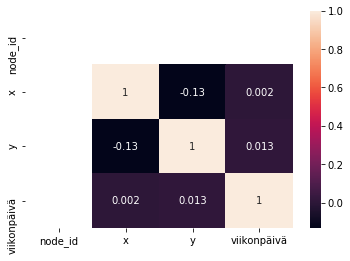

In [23]:
sn.heatmap(corrMatrix, annot=True)
plt.show()